## Atividade 12 - Séries e Transformadas de Fourier
### João Marcos Amorim de Almeida

- Tarefa 1 - Aproximação de formas de onda usando harmônicos: O artigo Fourier Series and Harmonic Approximation (link abaixo) traz alguns exemplos para verificação da série de Fourier para representação de sinais periódicos. Auxiliado pela referência Serie_de_Fourier.pdf (em anexo), explique os códigos implementados e os resultados obtidos no artigo;

---

### Imports

In [27]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from ipywidgets import interact

%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'avconv'
matplotlib.rcParams['figure.figsize'] = "8,3"

# workaround function for strange interact implementation
def showInInteract():
    import inspect
    for i in range(5):
        if 'interaction.py' in inspect.stack()[i][1]: plt.show()

### Funções e período

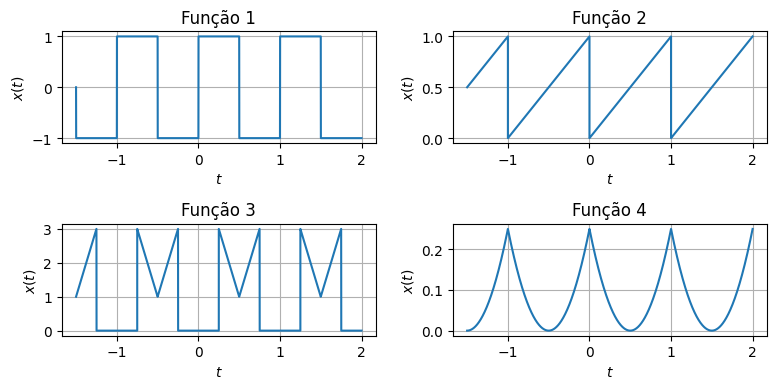

In [25]:
Fs = 10000
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
func2 = lambda t: t % 1
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25)
func4 = lambda t: ((t%1)-0.5)**2
t = np.arange(-1.5, 2, 1/Fs)
plt.figure(figsize=(8,4))
plt.subplot(221); plt.plot(t, func1(t))
plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.grid(True); plt.ylim((-1.1, 1.1)); plt.title("Função 1")
plt.subplot(222); plt.plot(t, func2(t))
plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.grid(True); plt.title("Função 2")
plt.subplot(223); plt.plot(t, func3(t))
plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.grid(True); plt.title("Função 3")
plt.subplot(224); plt.plot(t, func4(t))
plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.grid(True); plt.title("Função 4")
plt.tight_layout()

### Função para o cálculo da Série de Fourier

In [12]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

Usando para calcular os coeficientes até a 20ª ordem da primeira função:

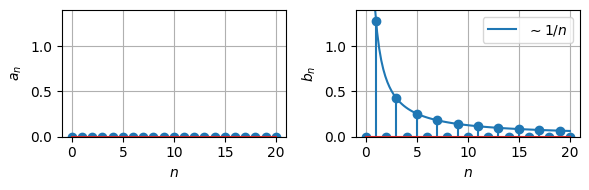

In [28]:
t_period = np.arange(0, 1, 1/Fs)
F = fourierSeries(func1(t_period), 20)
plt.figure(figsize=(6,2))
plt.subplot(121); plt.stem(F[:,0])
plt.grid(True); plt.xlabel('$n$'); plt.ylabel('$a_n$'); plt.ylim((0,1.4))
plt.subplot(122); plt.stem(F[:,1])
plt.grid(True); plt.xlabel('$n$'); plt.ylabel('$b_n$'); plt.ylim((0,1.4))
n = np.linspace(0.1,20,100);plt.plot(n, 4/(np.pi*n), label=r'$\sim 1/n$'); plt.legend(fontsize=10)
plt.tight_layout()

Fazemos duas observações aqui: Primeiro, vemos que $a_n=0$. Do gráfico para a função 1, vemos que é uma função ímpar, ou seja, $x(t)=-x(-t)$. Neste caso, a série de Fourier contém apenas funções ímpares, que são apenas os termos incluindo os senos (já que $\sin(x)=-\sin(-x)$). Segundo, os coeficientes de Fourier $b_n$ decaem lentamente com velocidade $1/n$ e cada 2º $b_n$ é zero. Podemos explicar isso relacionando-o ao conhecimento da [Transformada de Fourier](http://dspillustrations.com/pages/posts/misc/approximating-the-fourier-transform-with-dft.html): A função é uma soma de duas funções retangulares de largura $\frac{1}{2}s$. Sabemos que a transformada de Fourier de tal retângulo é uma função sinc, que tem zeros a uma distância de $2Hz$. Além disso, a magnitude da função sinc decai com $1/f$. Isso está muito em linha com os coeficientes obtidos: Eles decaem com $1/n$ e cada 2º valor é zero.

Vamos agora olhar para a reconstrução do sinal, ou seja, calculamos $x(t)$ a partir de seus coeficientes da série de Fourier até uma dada ordem. Escrevemos uma função `reconstruct` para fazer isso para nós:

In [31]:
def reconstruct(P, an_bn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(an_bn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

Let's have a look at the reconstructed signal for our rectangular function up to the 20th harmonic:

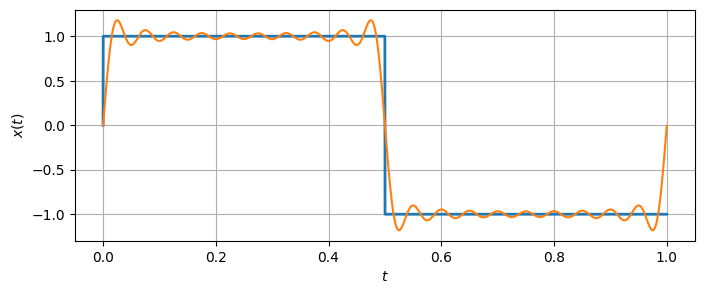

In [39]:
F = fourierSeries(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics');
# plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics');
plt.grid(True); plt.ylabel('$x(t)$'); plt.xlabel('$t$');

Como podemos ver, o sinal reconstruído segue aproximadamente o original, e quanto mais harmônicos forem usados, melhor. No entanto, também vemos que, especialmente na região do salto em $t=0,5$, o sinal reconstruído não é exato. Em vez disso, o sinal reconstruído flutua significativamente nesta posição. Este fenômeno é chamado de [Fenômeno de Gibbs](https://en.wikipedia.org/wiki/Gibbs_phenomenon "Link da Wikipédia") e descreve o fato de que a série de Fourier tem grandes oscilações em torno de descontinuidades de salto. Em particular, a altura do overshooting ou undershooting não depende do número de harmônicos e é aproximadamente 9% da altura do salto. No entanto, a duração das oscilações diminui com o número de harmônicos, eventualmente levando a uma aproximação correta no limite para infinitamente muitos harmônicos.

Vamos agora dar uma olhada na Série de Fourier de algumas funções e como sua aproximação pela série de Fourier aparece para diferentes números de harmônicos:


In [16]:
def showHarmonics(period, N):
    """Calculate the Fourier Series up to N harmonics, and show the reconstructed signal."""
    F = fourierSeries(period, N+1)
    plt.gcf().clear()
    plt.subplot(231); plt.stem(F[:,0])
    plt.xlim((0,20)); Vi = F.min(); Va = F.max(); plt.ylim((Vi,Va)); plt.ylabel('$a_n$')
    plt.subplot(234); plt.stem(F[:,1])
    plt.xlim((0,20)); plt.ylim((Vi,Va)); plt.xlabel('Harmonic'); plt.ylabel('$b_n$')
    plt.subplot(132)
    T = len(period)
    t = np.arange(T)/T
    result = 0
    for n, (an, bn) in enumerate(F):
        if n == 0:
            an = an/2
        cos_part = an*np.cos(2*np.pi*n*t)
        sin_part = bn*np.sin(2*np.pi*n*t)
        plt.plot(t, cos_part)
        plt.plot(t, sin_part)
        result = result + cos_part + sin_part
    plt.grid(True); plt.ylabel(r'$a_n \sin(2\pi n t), b_n\cos(2\pi nt)$'); plt.xlabel('$t$');
    plt.text(0.5, 0.8*abs(F[1:,:]).max(), 'N=%d' % N, bbox=dict(facecolor='white'))
    plt.subplot(133)
    t2 = np.arange(2*T)/T
    plt.plot(t2, np.tile(period, 2))
    plt.plot(t2, np.tile(result, 2))
    plt.grid(True); plt.ylabel(r'$x(t), r_N(t)$'); plt.xlabel('$t$');
    plt.ylim((period.min()-0.4, period.max()+0.4))
    plt.tight_layout()
    showInInteract()

Primeiro, vemos novamente a função retangular. Com o aumento do número de harmônicos, vemos que o retângulo é aproximado melhor. No entanto, também vemos que a quantidade de overshooting na descontinuidade do salto permanece constante, independente do número de harmônicos.

In [40]:
period = func1(np.arange(0, 1, 1/Fs))
interact(lambda N: showHarmonics(period, N), N=(1, 20));

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

A seguir está a função de rampa linear periódica. Novamente, vemos que a quantidade de overshooting na descontinuidade é independente do número de harmônicos. No entanto, a duração das oscilações se torna mais curta e, em geral, a aproximação se torna melhor com mais harmônicos. Além disso, exceto para o componente DC $a_0$, todos os coeficientes $a_n=0$. Isso se deve novamente ao fato de que a função é ímpar, ou seja, temos $x(t)=1-x(-t)$. Portanto, apenas os componentes para a onda senoidal são diferentes de zero.

In [41]:
period = func2(np.arange(0, 1, 1/Fs))
interact(lambda N: showHarmonics(period, N), N=(1, 20));

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

A terceira função parece mais complicada, pois tem mais saltos e é, em geral, mais irregular do que as funções anteriores. Na verdade, há uma quantidade significativa de overshooting na parte inferior do gráfico, que só diminui muito lentamente com mais harmônicos. Isso vem da grande quantidade de descontinuidades da função. A função é uma função par, ou seja, $x(t)=x(-t)$. Portanto, todos os $b_n=0$, que correspondem à contribuição das ondas senoidais. Em vez disso, apenas as ondas cosseno, que são funções pares, compõem a série geral de Fourier.

In [42]:
period = func3(np.arange(0, 1, 1/Fs))
interact(lambda N: showHarmonics(period, N), N=(1, 20));

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

Por fim, damos uma olhada na função de parábola periódica. Primeiro, reconhecemos que a função é bem aproximada com apenas pouquíssimos harmônicos. Podemos explicar isso pela suavidade geral da função sem descontinuidades. Além disso, identificamos novamente que $b_n=0$, já que $x(t)$ é uma função par, ou seja, $x(t)=x(-t)$.e

In [43]:
period = func4(np.arange(0, 1, 1/Fs))
interact(lambda N: showHarmonics(period, N), N=(1, 20));

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

Resumo
> - A Série de Fourier decompõe uma função periódica com período T em senos e cossenos com frequências $\frac{n}{T}, n=0,1,2,\ldots$ que são chamadas de $n$ésimas harmônicas do sinal. Quanto mais harmônicas são usadas, mais precisa uma função pode ser descrita.
> - Para **funções pares**, ou seja, $x(t)=x(-t)$, a série de Fourier **consiste apenas em cossenos**. Para **funções ímpares**, ou seja, $x(t)=-x(-t)$, a série de Fourier **consiste apenas em senos**.
> - Em descontinuidades de salto, o valor da série de Fourier está no meio do salto. Em torno do salto, ocorre o overshooting da série, que é chamado de **Fenômeno de Gibbs**. A quantidade de overshooting não reduz com o número de harmônicas, mas a duração reduz.
> - Em descontinuidades de salto, o valor da série de Fourier está no meio do salto. Em torno do salto, ocorre o overshooting da série, que é chamado de **Fenômeno de Gibbs**. A quantidade de overshooting não reduz com o número de harmônicas, mas a duração reduz.
> - Funções suaves precisam de menos harmônicos para serem descritas com precisão pela série de Fourier.

